In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import SGD,Adam
from keras.utils import to_categorical


import warnings
warnings.filterwarnings('ignore')



Using TensorFlow backend.


In [2]:
full_df = pd.read_csv('data/survey_results_public.csv')

In [3]:
list(full_df)

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

In [4]:
df = full_df.loc[:,[
    'Respondent',
    'Country',
    'Employment',
    'FormalEducation',
    'CompanySize',
    'DevType',
    'YearsCoding',
    'YearsCodingProf',
    'ConvertedSalary',
    'EducationTypes',
    'SelfTaughtTypes',
    'LanguageWorkedWith',
    'DatabaseWorkedWith',
    'PlatformWorkedWith',
    'FrameworkWorkedWith',
    'HoursComputer',
    'HoursOutside',
    'SkipMeals',
    'Exercise',
    'Age',
]]

### Clean Up Data

#### Look at data to find categories and multivalues.

In [5]:
for col in df.columns:
    print('Column: {} | Values: {}'.format(col, df[col].unique()))

Column: Respondent | Values: [     1      3      4 ... 101541 101544 101548]
Column: Country | Values: ['Kenya' 'United Kingdom' 'United States' 'South Africa' 'Nigeria' 'India'
 'Spain' 'Croatia' 'Netherlands' 'Israel' 'Sweden' 'Chile' 'Australia'
 'Greece' 'Poland' 'Belgium' 'Argentina' 'Germany' 'Russian Federation'
 'Indonesia' 'Ireland' 'France' 'Ukraine' 'Denmark' 'Dominican Republic'
 'China' 'Latvia' 'Algeria' 'Colombia' 'Japan' 'Finland' 'Romania'
 'Brazil' 'Bulgaria' 'Iran, Islamic Republic of...' 'Nepal' 'Bangladesh'
 'Pakistan' 'Canada' 'Jordan' 'Portugal' 'Italy' 'New Zealand' 'Turkey'
 'Czech Republic' 'Viet Nam' 'Austria' 'Egypt' 'Malaysia' 'Mozambique'
 'Thailand' 'Slovakia' 'Lebanon' 'Mexico' 'Hong Kong (S.A.R.)' 'Norway'
 'Myanmar' 'Switzerland' 'South Korea' 'Hungary' 'Armenia' 'Kazakhstan'
 'United Arab Emirates' 'Singapore' 'Qatar' 'Bosnia and Herzegovina'
 'Bahrain' 'Sri Lanka' 'Cambodia' 'Serbia' 'Philippines' 'Peru' 'Botswana'
 'Paraguay' 'Georgia' 'Uruguay' 'Be

### Create So many Categories

In [6]:
df['Employment'] = df['Employment'].astype(CategoricalDtype([
    'Retired',
    'Not employed, and not looking for work',
    'Not employed, but looking for work',
    'Employed part-time',
    'Independent contractor, freelancer, or self-employed',
    'Employed full-time'   
], ordered=True))

df['FormalEducation'] = df['FormalEducation'].astype(CategoricalDtype([
    'I never completed any formal education',
    'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Associate degree',
    'Some college/university study without earning a degree',
    'Bachelor’s degree (BA, BS, B.Eng., etc.)',
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
    'Professional degree (JD, MD, etc.)',
    'Other doctoral degree (Ph.D, Ed.D., etc.)'  
], ordered=True))


df['CompanySize'] = df['CompanySize'].astype(CategoricalDtype([
    'Fewer than 10 employees',
    '10 to 19 employees',
    '20 to 99 employees', 
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees'
], ordered=True))

df['YearsCoding'] = df['YearsCoding'].astype(CategoricalDtype([
    '0-2 years',
    '3-5 years',
    '6-8 years',
    '9-11 years',
    '12-14 years',
    '15-17 years',
    '18-20 years',
    '21-23 years',
    '24-26 years',
    '27-29',
    '30 or more years'
], ordered=True))

df['YearsCodingProf'] = df['YearsCodingProf'].astype(CategoricalDtype([
    '0-2 years',
    '3-5 years',
    '6-8 years',
    '9-11 years',
    '12-14 years',
    '15-17 years',
    '18-20 years',
    '21-23 years',
    '24-26 years',
    '27-29',
    '30 or more years'
], ordered=True))



df['HoursComputer'] = df['HoursComputer'].astype(CategoricalDtype([
    'Less than 1 hour',
    '1 - 4 hours',
    '5 - 8 hours',
    '9 - 12 hours', 
    'Over 12 hours' 
], ordered=True))

df['HoursOutside'] = df['HoursOutside'].astype(CategoricalDtype([
    'Less than 30 minutes',
    '30 - 59 minutes',
    '1 - 2 hours',
    '3 - 4 hours',
    'Over 4 hours'
], ordered=True))

df['SkipMeals'] = df['SkipMeals'].astype(CategoricalDtype([
    'Never',
    '1 - 2 times per week',
    '3 - 4 times per week', 
    'Daily or almost every day'
], ordered=True))

df['Exercise'] = df['Exercise'].astype(CategoricalDtype([
    "I don't typically exercise",
    '1 - 2 times per week',
    '3 - 4 times per week',
    'Daily or almost every day' 
], ordered=True))

df['Age'] = df['Age'].astype(CategoricalDtype([
    'Under 18 years old',
    '18 - 24 years old',
    '25 - 34 years old',
    '35 - 44 years old', 
    '45 - 54 years old',
    '55 - 64 years old', 
    '65 years or older'
], ordered=True))

df['Country'] = df['Country'].astype('category')

#### Now, turn all categories into ints

In [7]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['Country', 'Employment', 'FormalEducation', 'CompanySize',
       'YearsCoding', 'YearsCodingProf', 'HoursComputer', 'HoursOutside',
       'SkipMeals', 'Exercise', 'Age'],
      dtype='object')

In [8]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 20 columns):
Respondent             98855 non-null int64
Country                98855 non-null int16
Employment             98855 non-null int8
FormalEducation        98855 non-null int8
CompanySize            98855 non-null int8
DevType                92098 non-null object
YearsCoding            98855 non-null int8
YearsCodingProf        98855 non-null int8
ConvertedSalary        47702 non-null float64
EducationTypes         67960 non-null object
SelfTaughtTypes        57354 non-null object
LanguageWorkedWith     78334 non-null object
DatabaseWorkedWith     66270 non-null object
PlatformWorkedWith     65999 non-null object
FrameworkWorkedWith    51620 non-null object
HoursComputer          98855 non-null int8
HoursOutside           98855 non-null int8
SkipMeals              98855 non-null int8
Exercise               98855 non-null int8
Age                    98855 non-null int8
dtypes: floa

In [10]:
df.head()

,Respondent,Country,Employment,FormalEducation,CompanySize,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,FrameworkWorkedWith,HoursComputer,HoursOutside,SkipMeals,Exercise,Age
0,1,85,3,5,2,Full-stack developer,1,1,NaN,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,Django;React,3,2,0,2,2
1,3,173,5,5,7,Database administrator;DevOps specialist;Full-...,10,6,70841.0,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Linux,Django,2,1,0,3,3
2,4,175,5,3,2,Engineering manager;Full-stack developer,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1,-1
3,5,175,5,5,3,Full-stack developer,6,4,NaN,Completed an industry certification program (e...,The official documentation and/or standards fo...,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,NaN,3,0,2,0,3
4,7,150,5,4,7,Data or business analyst;Desktop or enterprise...,2,0,21426.0,Taken a part-time in-person course in programm...,The official documentation and/or standards fo...,C;C++;Java;Matlab;R;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,NaN,4,2,0,2,1


### Drop Salary NaNs and Outliers

In [11]:
df.dropna(subset=['ConvertedSalary'], inplace=True)

In [12]:
q1 = df['ConvertedSalary'].quantile(0.25)
q3 = df['ConvertedSalary'].quantile(0.75)
IQR = q3 - q1


ub = df['ConvertedSalary'] <= (q3 + (1.5 * IQR))

df = df[ub]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 20 columns):
Respondent             45069 non-null int64
Country                45069 non-null int16
Employment             45069 non-null int8
FormalEducation        45069 non-null int8
CompanySize            45069 non-null int8
DevType                44760 non-null object
YearsCoding            45069 non-null int8
YearsCodingProf        45069 non-null int8
ConvertedSalary        45069 non-null float64
EducationTypes         43318 non-null object
SelfTaughtTypes        38016 non-null object
LanguageWorkedWith     43912 non-null object
DatabaseWorkedWith     38370 non-null object
PlatformWorkedWith     38125 non-null object
FrameworkWorkedWith    30752 non-null object
HoursComputer          45069 non-null int8
HoursOutside           45069 non-null int8
SkipMeals              45069 non-null int8
Exercise               45069 non-null int8
Age                    45069 non-null int8
dtypes: floa

### Create Dummy Variables for Multi-response answer

In [14]:
DevType_dummies = pd.get_dummies(df['DevType'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_devtype').sum(level=0)

EdTypes_dummies = pd.get_dummies(df['EducationTypes'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_edtype').sum(level=0)

SelfTaughtTypes_dummies = pd.get_dummies(df['SelfTaughtTypes'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_selftype').sum(level=0)

Language_dummies = pd.get_dummies(df['LanguageWorkedWith'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_langs').sum(level=0)

Database_dummies = pd.get_dummies(df['DatabaseWorkedWith'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_db').sum(level=0)

Platform_dummies = pd.get_dummies(df['PlatformWorkedWith'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_pform').sum(level=0)

Framework_dummies = pd.get_dummies(df['FrameworkWorkedWith'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_fwork').sum(level=0)


In [15]:
x_df = df
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 20 columns):
Respondent             45069 non-null int64
Country                45069 non-null int16
Employment             45069 non-null int8
FormalEducation        45069 non-null int8
CompanySize            45069 non-null int8
DevType                44760 non-null object
YearsCoding            45069 non-null int8
YearsCodingProf        45069 non-null int8
ConvertedSalary        45069 non-null float64
EducationTypes         43318 non-null object
SelfTaughtTypes        38016 non-null object
LanguageWorkedWith     43912 non-null object
DatabaseWorkedWith     38370 non-null object
PlatformWorkedWith     38125 non-null object
FrameworkWorkedWith    30752 non-null object
HoursComputer          45069 non-null int8
HoursOutside           45069 non-null int8
SkipMeals              45069 non-null int8
Exercise               45069 non-null int8
Age                    45069 non-null int8
dtypes: floa

In [16]:
x_df = pd.concat([x_df, DevType_dummies], axis=1)
x_df = pd.concat([x_df, EdTypes_dummies], axis=1)
x_df = pd.concat([x_df, SelfTaughtTypes_dummies], axis=1)
x_df = pd.concat([x_df, Language_dummies], axis=1)
x_df = pd.concat([x_df, Database_dummies], axis=1)
x_df = pd.concat([x_df, Platform_dummies], axis=1)
x_df = pd.concat([x_df, Framework_dummies], axis=1)


x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Columns: 155 entries, Respondent to var_fwork_Xamarin
dtypes: float64(136), int16(1), int64(1), int8(10), object(7)
memory usage: 50.4+ MB


In [17]:
x_df = x_df.drop([
    'DevType',
    'EducationTypes',
    'SelfTaughtTypes',
    'LanguageWorkedWith',
    'DatabaseWorkedWith',
    'PlatformWorkedWith',
    'FrameworkWorkedWith',
], axis=1)

x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Columns: 148 entries, Respondent to var_fwork_Xamarin
dtypes: float64(136), int16(1), int64(1), int8(10)
memory usage: 48.0 MB


### Add new column for converted salary bins 

In [18]:
x_df['SalaryBins'] = pd.qcut(x_df["ConvertedSalary"], 4, labels=False)
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Columns: 149 entries, Respondent to SalaryBins
dtypes: float64(136), int16(1), int64(2), int8(10)
memory usage: 48.3 MB


In [19]:
x_df['SalaryBins']

1        2
4        0
5        1
6        3
14       0
17       1
20       3
22       0
23       2
24       0
25       1
26       2
30       1
32       1
33       2
35       2
41       3
42       0
43       2
45       0
46       3
47       2
49       3
51       3
53       2
56       3
57       0
62       3
63       1
65       0
        ..
89796    0
89806    0
89815    0
89816    0
89820    0
89832    0
89835    0
89839    3
89846    0
89853    0
89859    0
89871    0
89874    0
89888    0
89896    0
89898    0
89904    0
89911    0
89913    1
89922    0
89925    0
89926    0
89929    0
89932    3
89938    0
89941    0
89946    0
89954    0
89960    0
89965    0
Name: SalaryBins, Length: 45069, dtype: int64

In [20]:
x_df.dtypes

Respondent                                                     int64
Country                                                        int16
Employment                                                      int8
FormalEducation                                                 int8
CompanySize                                                     int8
YearsCoding                                                     int8
YearsCodingProf                                                 int8
ConvertedSalary                                              float64
HoursComputer                                                   int8
HoursOutside                                                    int8
SkipMeals                                                       int8
Exercise                                                        int8
Age                                                             int8
var_devtype_Back-end developer                               float64
var_devtype_C-suite executive (CEO

In [21]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Columns: 149 entries, Respondent to SalaryBins
dtypes: float64(136), int16(1), int64(2), int8(10)
memory usage: 48.3 MB


### Create Dataset for Salary NN

In [22]:
dataset = x_df.values

In [23]:
dataset

array([[3.00000e+00, 1.73000e+02, 5.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.00000e+00],
       [7.00000e+00, 1.50000e+02, 5.00000e+00, ...,         nan,
                nan, 0.00000e+00],
       [8.00000e+00, 1.73000e+02, 5.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [1.00743e+05, 6.10000e+01, 1.00000e+00, ...,         nan,
                nan, 0.00000e+00],
       [1.00927e+05, 1.51000e+02, 5.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.01115e+05, 7.40000e+01, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

### Create X and Y variables and split into training, val, and test sets

In [24]:
X = dataset[:,0:148]

In [25]:
Y = dataset[:,148].astype(int)

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
Y1 = encoder.fit_transform(Y)

Y = pd.get_dummies(Y1).values

In [27]:
Y

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [29]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [30]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [31]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(31548, 148) (6760, 148) (6761, 148) (31548, 4) (6760, 4) (6761, 4)


### Create Salary Model

In [32]:
model = Sequential()

model.add(Dense(32, input_shape=(148,), activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(4, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                4768      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
Total params: 5,956
Trainable params: 5,956
Non-trainable params: 0
_________________________________________________________________


### Train the model 

In [35]:
batch_size = 1000
epochs = 10

history = model.fit(X_train,
                    Y_train,
                    validation_data=(X_val, Y_val),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 31548 samples, validate on 6760 samples
Epoch 1/10
31548/31548 [==============================] - 0s 10us/step - loss: 1.4105 - acc: 0.2492 - val_loss: 1.3867 - val_acc: 0.2605
Epoch 2/10
31548/31548 [==============================] - 0s 3us/step - loss: 1.3873 - acc: 0.2505 - val_loss: 1.3870 - val_acc: 0.2574
Epoch 3/10
31548/31548 [==============================] - 0s 3us/step - loss: 1.3871 - acc: 0.2448 - val_loss: 1.3897 - val_acc: 0.2389
Epoch 4/10
31548/31548 [==============================] - 0s 3us/step - loss: 1.3870 - acc: 0.2511 - val_loss: 1.3885 - val_acc: 0.2389
Epoch 5/10
31548/31548 [==============================] - 0s 3us/step - loss: 1.3870 - acc: 0.2499 - val_loss: 1.3878 - val_acc: 0.2389
Epoch 6/10
31548/31548 [==============================] - 0s 3us/step - loss: 1.3869 - acc: 0.2496 - val_loss: 1.3875 - val_acc: 0.2432
Epoch 7/10
31548/31548 [==============================] - 0s 4us/step - loss: 1.3872 -

In [36]:
score = model.evaluate(X_test,
                       Y_test,
                       batch_size=batch_size,
                       verbose=1)

print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

6761/6761 [==============================] - 0s 3us/step
Test loss: 1.387
Test accuracy: 0.25


In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

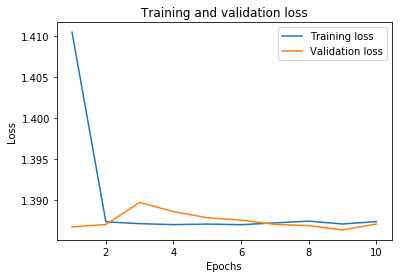

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

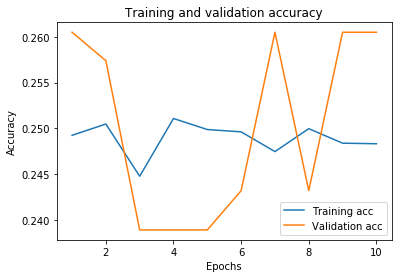

In [39]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Create NN for predicting Job Satisfaction

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 20 columns):
Respondent             45069 non-null int64
Country                45069 non-null int16
Employment             45069 non-null int8
FormalEducation        45069 non-null int8
CompanySize            45069 non-null int8
DevType                44760 non-null object
YearsCoding            45069 non-null int8
YearsCodingProf        45069 non-null int8
ConvertedSalary        45069 non-null float64
EducationTypes         43318 non-null object
SelfTaughtTypes        38016 non-null object
LanguageWorkedWith     43912 non-null object
DatabaseWorkedWith     38370 non-null object
PlatformWorkedWith     38125 non-null object
FrameworkWorkedWith    30752 non-null object
HoursComputer          45069 non-null int8
HoursOutside           45069 non-null int8
SkipMeals              45069 non-null int8
Exercise               45069 non-null int8
Age                    45069 non-null int8
dtypes: floa

In [41]:
job_df = full_df.loc[:,[
    'Respondent',
    'Country',
    'Employment',
    'FormalEducation',
    'CompanySize',
    'DevType',
    'YearsCoding',
    'YearsCodingProf',
    'ConvertedSalary',
    'EducationTypes',
    'SelfTaughtTypes',
    'HoursComputer',
    'HoursOutside',
    'SkipMeals',
    'Exercise',
    'Age',
    'JobSatisfaction'
]]

In [42]:
job_df['Employment'] = df['Employment'].astype(CategoricalDtype([
    'Retired',
    'Not employed, and not looking for work',
    'Not employed, but looking for work',
    'Employed part-time',
    'Independent contractor, freelancer, or self-employed',
    'Employed full-time'   
], ordered=True))

job_df['FormalEducation'] = df['FormalEducation'].astype(CategoricalDtype([
    'I never completed any formal education',
    'Primary/elementary school',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'Associate degree',
    'Some college/university study without earning a degree',
    'Bachelor’s degree (BA, BS, B.Eng., etc.)',
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
    'Professional degree (JD, MD, etc.)',
    'Other doctoral degree (Ph.D, Ed.D., etc.)'  
], ordered=True))


job_df['CompanySize'] = df['CompanySize'].astype(CategoricalDtype([
    'Fewer than 10 employees',
    '10 to 19 employees',
    '20 to 99 employees', 
    '100 to 499 employees',
    '500 to 999 employees',
    '1,000 to 4,999 employees',
    '5,000 to 9,999 employees',
    '10,000 or more employees'
], ordered=True))

job_df['YearsCoding'] = df['YearsCoding'].astype(CategoricalDtype([
    '0-2 years',
    '3-5 years',
    '6-8 years',
    '9-11 years',
    '12-14 years',
    '15-17 years',
    '18-20 years',
    '21-23 years',
    '24-26 years',
    '27-29',
    '30 or more years'
], ordered=True))

job_df['YearsCodingProf'] = df['YearsCodingProf'].astype(CategoricalDtype([
    '0-2 years',
    '3-5 years',
    '6-8 years',
    '9-11 years',
    '12-14 years',
    '15-17 years',
    '18-20 years',
    '21-23 years',
    '24-26 years',
    '27-29',
    '30 or more years'
], ordered=True))



job_df['HoursComputer'] = df['HoursComputer'].astype(CategoricalDtype([
    'Less than 1 hour',
    '1 - 4 hours',
    '5 - 8 hours',
    '9 - 12 hours', 
    'Over 12 hours' 
], ordered=True))

job_df['HoursOutside'] = df['HoursOutside'].astype(CategoricalDtype([
    'Less than 30 minutes',
    '30 - 59 minutes',
    '1 - 2 hours',
    '3 - 4 hours',
    'Over 4 hours'
], ordered=True))

job_df['SkipMeals'] = df['SkipMeals'].astype(CategoricalDtype([
    'Never',
    '1 - 2 times per week',
    '3 - 4 times per week', 
    'Daily or almost every day'
], ordered=True))

job_df['Exercise'] = df['Exercise'].astype(CategoricalDtype([
    "I don't typically exercise",
    '1 - 2 times per week',
    '3 - 4 times per week',
    'Daily or almost every day' 
], ordered=True))

job_df['Age'] = df['Age'].astype(CategoricalDtype([
    'Under 18 years old',
    '18 - 24 years old',
    '25 - 34 years old',
    '35 - 44 years old', 
    '45 - 54 years old',
    '55 - 64 years old', 
    '65 years or older'
], ordered=True))

job_df['Country'] = df['Country'].astype('category')

job_df['JobSatisfaction'] = job_df['JobSatisfaction'].astype(CategoricalDtype([
    'Extremely dissatisfied',
    'Moderately dissatisfied',
    'Slightly dissatisfied', 
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Moderately satisfied',
    'Extremely satisfied'    
], ordered=True))

In [43]:
cat_columns = job_df.select_dtypes(['category']).columns
cat_columns
job_df[cat_columns] = job_df[cat_columns].apply(lambda x: x.cat.codes)

In [44]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 17 columns):
Respondent         98855 non-null int64
Country            98855 non-null int16
Employment         98855 non-null int8
FormalEducation    98855 non-null int8
CompanySize        98855 non-null int8
DevType            92098 non-null object
YearsCoding        98855 non-null int8
YearsCodingProf    98855 non-null int8
ConvertedSalary    47702 non-null float64
EducationTypes     67960 non-null object
SelfTaughtTypes    57354 non-null object
HoursComputer      98855 non-null int8
HoursOutside       98855 non-null int8
SkipMeals          98855 non-null int8
Exercise           98855 non-null int8
Age                98855 non-null int8
JobSatisfaction    98855 non-null int8
dtypes: float64(1), int16(1), int64(1), int8(11), object(3)
memory usage: 5.0+ MB


In [45]:
DevType_dummies = pd.get_dummies(job_df['DevType'].str.split(';', expand=True).apply(lambda s: s.str.strip()).stack(), prefix='var_devtype').sum(level=0)


In [46]:
job_df = pd.concat([job_df, DevType_dummies], axis=1)

job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98855 entries, 0 to 98854
Data columns (total 37 columns):
Respondent                                                   98855 non-null int64
Country                                                      98855 non-null int16
Employment                                                   98855 non-null int8
FormalEducation                                              98855 non-null int8
CompanySize                                                  98855 non-null int8
DevType                                                      92098 non-null object
YearsCoding                                                  98855 non-null int8
YearsCodingProf                                              98855 non-null int8
ConvertedSalary                                              47702 non-null float64
EducationTypes                                               67960 non-null object
SelfTaughtTypes                                              57354 non-n

In [47]:
job_df = job_df.drop([
    'DevType',
    'EducationTypes',
    'SelfTaughtTypes',
], axis=1)

job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98855 entries, 0 to 98854
Data columns (total 34 columns):
Respondent                                                   98855 non-null int64
Country                                                      98855 non-null int16
Employment                                                   98855 non-null int8
FormalEducation                                              98855 non-null int8
CompanySize                                                  98855 non-null int8
YearsCoding                                                  98855 non-null int8
YearsCodingProf                                              98855 non-null int8
ConvertedSalary                                              47702 non-null float64
HoursComputer                                                98855 non-null int8
HoursOutside                                                 98855 non-null int8
SkipMeals                                                    98855 non-null 

In [48]:
print("Correlation Matrix")
print(job_df.corr())
print()

def get_redundant_pairs(job_df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = job_df.columns
    for i in range(0, job_df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(job_df, n=5):
    au_corr = job_df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(job_df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(job_df, 20))

Correlation Matrix
                                                    Respondent   Country  \
Respondent                                            1.000000 -0.001205   
Country                                              -0.001205  1.000000   
Employment                                                 NaN       NaN   
FormalEducation                                            NaN       NaN   
CompanySize                                                NaN       NaN   
YearsCoding                                                NaN       NaN   
YearsCodingProf                                            NaN       NaN   
ConvertedSalary                                       0.003645 -0.249440   
HoursComputer                                              NaN       NaN   
HoursOutside                                               NaN       NaN   
SkipMeals                                                  NaN       NaN   
Exercise                                                   NaN       

var_devtype_Database administrator                         var_devtype_System administrator                             0.390092
Country                                                    JobSatisfaction                                              0.358873
JobSatisfaction                                            var_devtype_Student                                          0.317684
var_devtype_Front-end developer                            var_devtype_Full-stack developer                             0.305372
var_devtype_Back-end developer                             var_devtype_Front-end developer                              0.281138
var_devtype_DevOps specialist                              var_devtype_System administrator                             0.269502
var_devtype_Designer                                       var_devtype_Front-end developer                              0.262012
var_devtype_Data or business analyst                       var_devtype_Data scientist or machine 

In [49]:
job_sat = job_df['JobSatisfaction']
job_df = job_df.drop([
    'JobSatisfaction'
], axis=1)
job_df = pd.concat([job_df, job_sat], axis=1)

list(job_df)

['Respondent',
 'Country',
 'Employment',
 'FormalEducation',
 'CompanySize',
 'YearsCoding',
 'YearsCodingProf',
 'ConvertedSalary',
 'HoursComputer',
 'HoursOutside',
 'SkipMeals',
 'Exercise',
 'Age',
 'var_devtype_Back-end developer',
 'var_devtype_C-suite executive (CEO, CTO, etc.)',
 'var_devtype_Data or business analyst',
 'var_devtype_Data scientist or machine learning specialist',
 'var_devtype_Database administrator',
 'var_devtype_Designer',
 'var_devtype_Desktop or enterprise applications developer',
 'var_devtype_DevOps specialist',
 'var_devtype_Educator or academic researcher',
 'var_devtype_Embedded applications or devices developer',
 'var_devtype_Engineering manager',
 'var_devtype_Front-end developer',
 'var_devtype_Full-stack developer',
 'var_devtype_Game or graphics developer',
 'var_devtype_Marketing or sales professional',
 'var_devtype_Mobile developer',
 'var_devtype_Product manager',
 'var_devtype_QA or test developer',
 'var_devtype_Student',
 'var_devtype_S

In [50]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98855 entries, 0 to 98854
Data columns (total 34 columns):
Respondent                                                   98855 non-null int64
Country                                                      98855 non-null int16
Employment                                                   98855 non-null int8
FormalEducation                                              98855 non-null int8
CompanySize                                                  98855 non-null int8
YearsCoding                                                  98855 non-null int8
YearsCodingProf                                              98855 non-null int8
ConvertedSalary                                              47702 non-null float64
HoursComputer                                                98855 non-null int8
HoursOutside                                                 98855 non-null int8
SkipMeals                                                    98855 non-null 

### Build the Dataset for Job Satisfaction NN

In [51]:
job_dataset = job_df.values

In [52]:
jX = job_dataset[:,0:33]

In [53]:
jY = job_dataset[:,33].astype(int)

In [54]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
jY1 = encoder.fit_transform(jY)

jY = pd.get_dummies(jY1).values

In [55]:
jY

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [56]:
min_max_scaler = preprocessing.MinMaxScaler()
jX_scale = min_max_scaler.fit_transform(jX)

In [57]:
jX_train, jX_val_and_test, jY_train, jY_val_and_test = train_test_split(jX_scale, jY, test_size=0.3)

In [58]:
jX_val, jX_test, jY_val, jY_test = train_test_split(jX_val_and_test, jY_val_and_test, test_size=0.5)

In [59]:
print(jX_train.shape, jX_val.shape, jX_test.shape, jY_train.shape, jY_val.shape, jY_test.shape)

(69198, 33) (14828, 33) (14829, 33) (69198, 8) (14828, 8) (14829, 8)


### Build the Model for Job Satisfaction NN

In [60]:
jmodel = Sequential()

jmodel.add(Dense(128, input_shape=(33,), activation='tanh'))
jmodel.add(Dense(64, activation='tanh'))
jmodel.add(Dense(64, activation='tanh'))
jmodel.add(Dense(32, activation='tanh'))
jmodel.add(Dense(8, activation='softmax'))

In [61]:
jmodel.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
jmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               4352      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 264       
Total params: 19,112
Trainable params: 19,112
Non-trainable params: 0
_________________________________________________________________


In [63]:
jbatch_size = 1000
jepochs = 10

jhistory = jmodel.fit(jX_train,
                    jY_train,
                    validation_data=(jX_val, jY_val),
                    batch_size=jbatch_size,
                    epochs=jepochs,
                    verbose=1)

Train on 69198 samples, validate on 14828 samples
Epoch 1/10
69198/69198 [==============================] - 0s 7us/step - loss: 1.8359 - acc: 0.2864 - val_loss: 1.8136 - val_acc: 0.2959
Epoch 2/10
69198/69198 [==============================] - 0s 5us/step - loss: 1.8096 - acc: 0.3019 - val_loss: 1.8136 - val_acc: 0.2959
Epoch 3/10
69198/69198 [==============================] - 0s 5us/step - loss: 1.8096 - acc: 0.3019 - val_loss: 1.8136 - val_acc: 0.2959
Epoch 4/10
69198/69198 [==============================] - 0s 5us/step - loss: 1.8096 - acc: 0.3019 - val_loss: 1.8139 - val_acc: 0.2959
Epoch 5/10
69198/69198 [==============================] - 0s 5us/step - loss: 1.8095 - acc: 0.3019 - val_loss: 1.8140 - val_acc: 0.2959
Epoch 6/10
69198/69198 [==============================] - 0s 5us/step - loss: 1.8096 - acc: 0.3019 - val_loss: 1.8139 - val_acc: 0.2959
Epoch 7/10
69198/69198 [==============================] - 0s 5us/step - loss: 1.8096 - acc: 0.3019 - val_loss: 1.8137 - val_acc: 0.295

In [64]:
jscore = jmodel.evaluate(jX_test,
                       jY_test,
                       batch_size=jbatch_size,
                       verbose=1)

print('Test loss:', round(jscore[0], 3))
print('Test accuracy:', round(jscore[1], 3))

14829/14829 [==============================] - 0s 2us/step
Test loss: 1.824
Test accuracy: 0.29


In [65]:
jhistory_dict = jhistory.history
jhistory_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

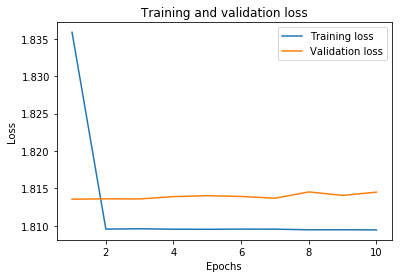

In [66]:
jacc = jhistory.history['acc']
jval_acc = jhistory.history['val_acc']
jloss = jhistory.history['loss']
jval_loss = jhistory.history['val_loss']

jepochs = range(1, len(acc) + 1)

plt.plot(jepochs, jloss, label='Training loss')
plt.plot(jepochs, jval_loss, label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

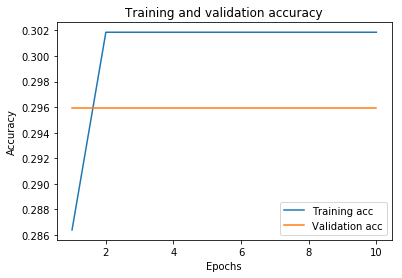

In [70]:
jacc_values = jhistory_dict['acc']
jval_acc_values = jhistory_dict['val_acc']

plt.plot(jepochs, jacc, label='Training acc')
plt.plot(jepochs, jval_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()